<a href="https://colab.research.google.com/github/nestorelermar/dataset/blob/main/Modelo_de_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import re

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

!git clone https://github.com/nestorelermar/dataset.git

image_size = (224, 224)
batch_size = 10
class_names = ['cardboard','glass','metal','organic','paper','plastic','trash']

train_path = '/content/dataset/train'
valid_path = '/content/dataset/valid'
test_path = '/content/dataset/test'

train_batches = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40, horizontal_flip=True, width_shift_range=0.2,
        height_shift_range=0.2, zoom_range=0.2, fill_mode='nearest', preprocessing_function = preprocess_input) \
.flow_from_directory(directory=train_path, target_size=image_size, classes=class_names, batch_size=batch_size, class_mode='categorical')

valid_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=image_size, classes=class_names, batch_size=batch_size, class_mode='categorical')

test_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input) \
.flow_from_directory(directory=test_path, target_size=image_size, classes=class_names, batch_size=batch_size, shuffle=False, class_mode='categorical')

train_batches_nopre = tf.keras.preprocessing.image.ImageDataGenerator(dtype='uint8', rotation_range=40, horizontal_flip=True, width_shift_range=0.2,
        height_shift_range=0.2, zoom_range=0.2, fill_mode='nearest') \
.flow_from_directory(directory=train_path, target_size=image_size, classes=class_names, batch_size=batch_size, class_mode='categorical')

valid_batches_nopre = tf.keras.preprocessing.image.ImageDataGenerator(dtype='uint8') \
.flow_from_directory(directory=valid_path, target_size=image_size, classes=class_names, batch_size=batch_size, class_mode='categorical')

test_batches_nopre = tf.keras.preprocessing.image.ImageDataGenerator(dtype='uint8') \
.flow_from_directory(directory=test_path, target_size=image_size, classes=class_names, batch_size=batch_size, shuffle=False, class_mode='categorical')

fatal: destination path 'dataset' already exists and is not an empty directory.
Found 4200 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
Found 4200 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [6]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, pooling='avg')

29084464/29084464 [==============================] - 0s 0us/step


In [7]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']

In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(7, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

In [11]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.evaluate(x=test_batches, verbose=1, steps=140)

140/140 [==============================] - 214s 1s/step - loss: 2.4202 - accuracy: 0.1093


[2.4201605319976807, 0.10928571224212646]

# Predicciones del modelo

# Pruebas con imágenes propias

# PRUEBA: Modelo con preprocesado

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

In [13]:
# load model
model_use = load_model('/content/dataset/model/modelo_reciclaje.h5')
# summarize model.
model_use.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

In [14]:
i = Input([None, None, 3], dtype = tf.uint8)
x = tf.cast(i, tf.float32)
x = preprocess_input(x)
x = model_use(x)
model_new = Model(inputs=[i], outputs=[x])

In [15]:
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 tf.cast (TFOpLambda)        (None, None, None, 3)     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, None, None, 3)     0         
 a)                                                              
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, None, None, 3)     0         
 )                                                               
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, None, None, 3)     0         
 bda)                                                            
                                                           

In [16]:
model_new.compile(optimizer=SGD(lr=0.00001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# model_new.save('export/Servo/1')
#model_new.save('export_test/Servo/1')

In [18]:
model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 tf.cast (TFOpLambda)        (None, None, None, 3)     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, None, None, 3)     0         
 a)                                                              
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, None, None, 3)     0         
 )                                                               
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, None, None, 3)     0         
 bda)                                                            
                                                           

In [19]:
predictions_new = model_new.predict(x=test_batches_nopre, verbose=1, steps=140)

140/140 [==============================] - 209s 1s/step


In [20]:
np.round(predictions_new)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
cm_new = confusion_matrix(y_true=test_batches_nopre.classes, y_pred=np.argmax(predictions_new, axis=-1))

# PRUEBAS

In [22]:
import numpy as np
from PIL import Image

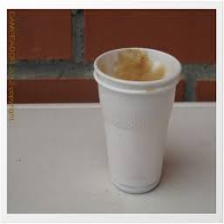

1/1 [==============================] - 0s 348ms/step
Class: trash 97.09%
--------------------------------------------------------------------
Tipo de residuo: Otros
Arrojar en el Contenedor negro (Residuos comunes)
--------------------------------------------------------------------


In [34]:
classes = ['cardboard', 'glass', 'metal', 'organic', 'paper', 'plastic', 'trash']
img_name = '/content/prueba19.jpg'

data_s = Image.open(img_name)
image_res = data_s.resize((224, 224), Image.BILINEAR)
image_dim = np.array(image_res)
image_dim = np.expand_dims(image_dim, axis=0)

display(image_res)

results = model_new.predict(image_dim)
print('Class: ' + classes[np.argmax(results)] + ' ' + str(round(results[0, np.argmax(results)] * 100, 2)) + '%')

def spanish_output(results):
    if results == 'cardboard':
        detect = 'Cartón'
        trash = 'Contenedor azul (Papel y cartón)'
    elif results == 'glass':
        detect = 'Vidrio'
        trash = 'Contenedor blanco (Plástico y vidrio)'
    elif results == 'metal':
        detect = 'Metal'
        trash = 'Contenedor amarillo (Amarillo)'
    elif results == 'paper':
        detect = 'Papel'
        trash = 'Contenedor azul (Papel y cartón)'
    elif results == 'plastic':
        detect = 'Plástico'
        trash = 'Contenedor blanco (Plástico y vidrio)'
    elif results == 'organic':
        detect = 'Organico'
        trash = 'Contenedor verde (Residuos organicos solidos)'
    elif results == 'trash':
        detect = 'Otros'
        trash = 'Contenedor negro (Residuos comunes)'
    return detect, trash

detect, trash = spanish_output(classes[np.argmax(results)])
print('----' * 17)
print('Tipo de residuo:', detect)
print('Arrojar en el', trash)
print('----' * 17)

